In [1]:
import sys
import csv
import os
sys.path.insert(0, '..')
import ecoscape_connectivity
from scgt import GeoTiff, Tile
import time
import torch
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = (torch.device('cuda') if torch.cuda.is_available() else 
          torch.device('mps') if torch.backends.mps.is_available() else
          torch.device('cpu'))


In [4]:
DATA_PATH="assets"

HABITAT_PATH = os.path.join(DATA_PATH, "habitat_CA.tif")
LANDCOVER_PATH = os.path.join(DATA_PATH, "terrain_CA.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "permeability_CA.csv")


In [5]:
permeability_dict = ecoscape_connectivity.read_transmission_csv(PERMEABILITY_PATH)

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "Outputs/connectivity_CA.tif")
FLOW_PATH = os.path.join(DATA_PATH, "Outputs/flow_CA.tif")


## Experiment

## Infinite flips w termination

Time: 21.772995948791504
(1, 189, 233)


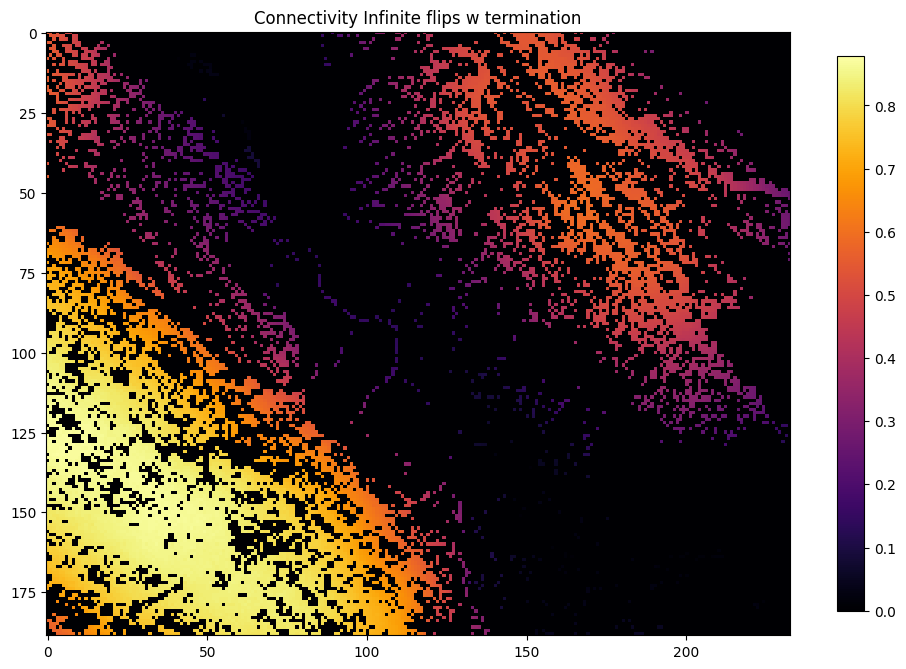

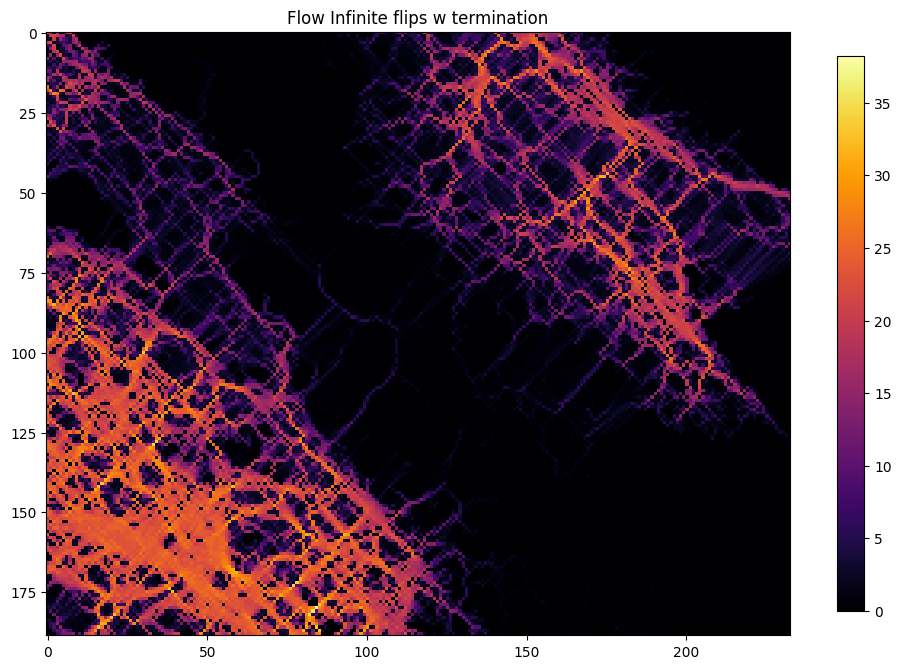

In [6]:
from IPython.display import display, Markdown
algos = [
    "compute_connectivity_v5", 
    ]
titles = {
    "compute_connectivity_diagonal": "Diagonal penalization",
    "compute_connectivity_orig": "Original",
    "compute_connectivity_v4": "Infinite flips",
    "compute_connectivity_v5": "Infinite flips w termination",
    "compute_connectivity_v3": "Two coin flips",
    "compute_connectivity_v2": "Single coin flip",
    
}

for algo in algos:
    display(Markdown(f"## {titles[algo]}"))
    t0 = time.time()
    alg = getattr(ecoscape_connectivity, algo)
    alg(
        habitat_fn=HABITAT_PATH,
        landcover_fn=LANDCOVER_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=CONNECTIVITY_PATH,
        flow_fn=FLOW_PATH,
        single_tile=True,
        border_size=50,
        batch_size=20,
        num_simulations=1000,
        include_border=False,
        dispersal=50,
    )
    print("Time:", time.time() - t0)
    single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
    t = single_connectivity.get_all_as_tile(b=0)
    print(t.m.shape)
    t.draw_tile(width=12, height=12, title=f"Connectivity {titles[algo]}")
    single_flow = GeoTiff.from_file(FLOW_PATH)
    t = single_flow.get_all_as_tile(b=0)
    t.draw_tile(width=12, height=12, title=f"Flow {titles[algo]}")

## Longer dispersal

## Infinite flips w termination

Time: 45.78189778327942
(1, 189, 233)


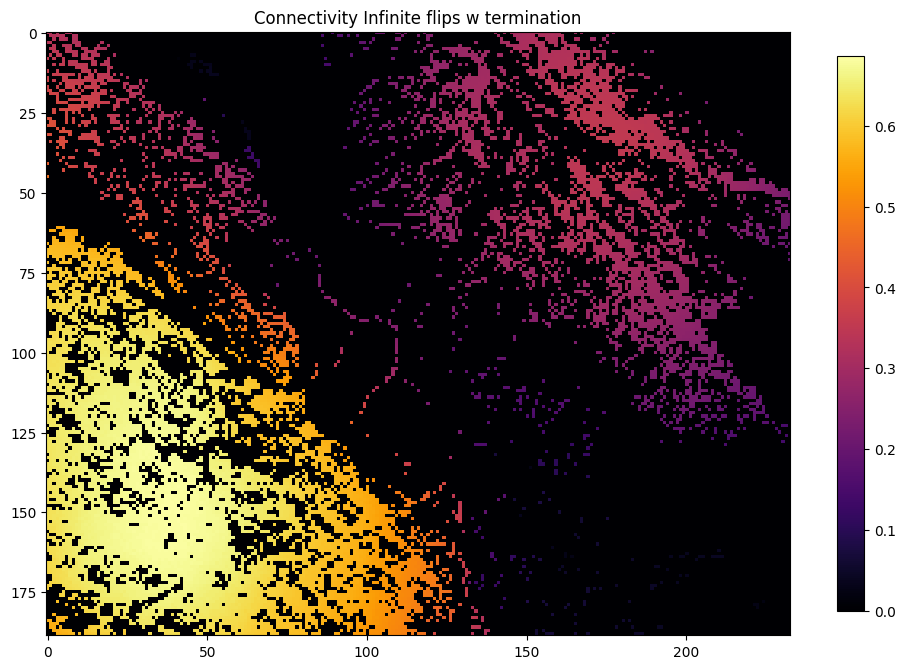

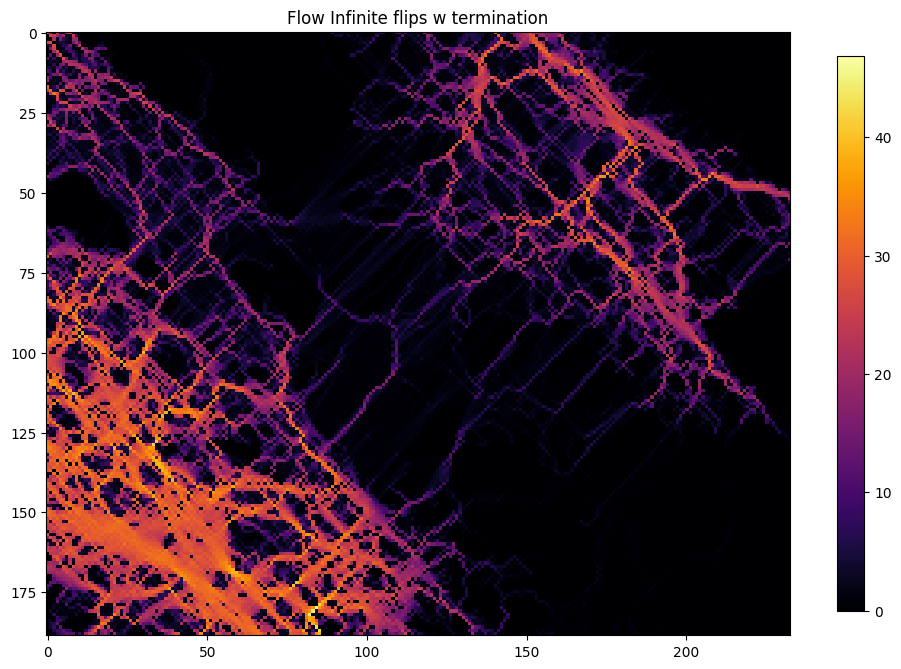

## Original

Time: 32.980926275253296
(1, 189, 233)


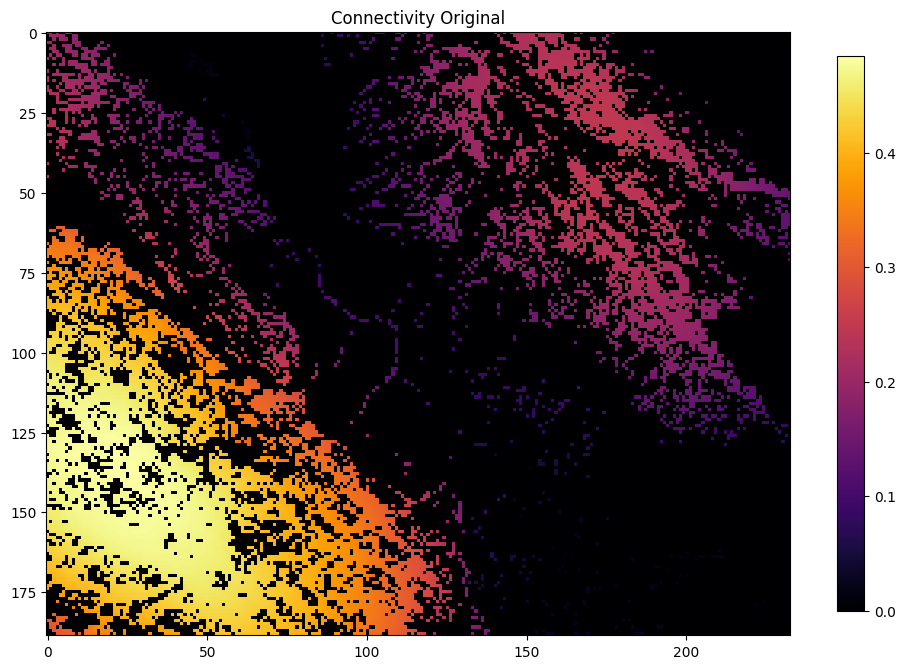

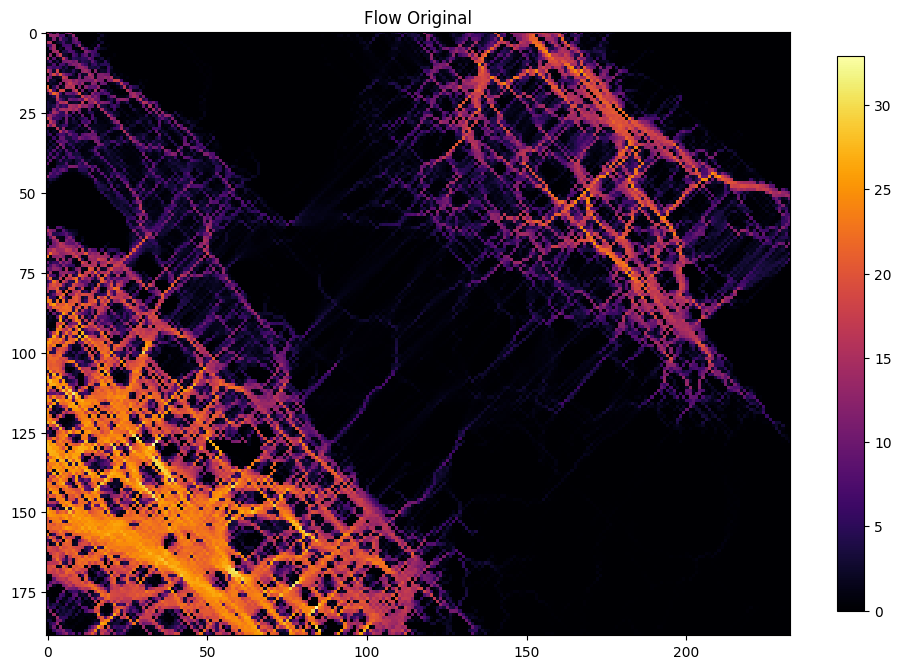

In [7]:
from IPython.display import display, Markdown
algos = [
    "compute_connectivity_v5", 
    "compute_connectivity_orig",
    ]
titles = {
    "compute_connectivity_diagonal": "Diagonal penalization",
    "compute_connectivity_orig": "Original",
    "compute_connectivity_v4": "Infinite flips",
    "compute_connectivity_v5": "Infinite flips w termination",
    "compute_connectivity_v3": "Two coin flips",
    "compute_connectivity_v2": "Single coin flip",
    
}

for algo in algos:
    display(Markdown(f"## {titles[algo]}"))
    t0 = time.time()
    alg = getattr(ecoscape_connectivity, algo)
    alg(
        habitat_fn=HABITAT_PATH,
        landcover_fn=LANDCOVER_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=CONNECTIVITY_PATH,
        flow_fn=FLOW_PATH,
        single_tile=True,
        border_size=50,
        batch_size=20,
        gap_crossing=0,
        num_simulations=1000,
        include_border=False,
        dispersal=100,
    )
    print("Time:", time.time() - t0)
    single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
    t = single_connectivity.get_all_as_tile(b=0)
    print(t.m.shape)
    t.draw_tile(width=12, height=12, title=f"Connectivity {titles[algo]}")
    single_flow = GeoTiff.from_file(FLOW_PATH)
    t = single_flow.get_all_as_tile(b=0)
    t.draw_tile(width=12, height=12, title=f"Flow {titles[algo]}")

## Scaled permeability

## Infinite flips w termination

Time: 79.56609272956848
(1, 189, 233)


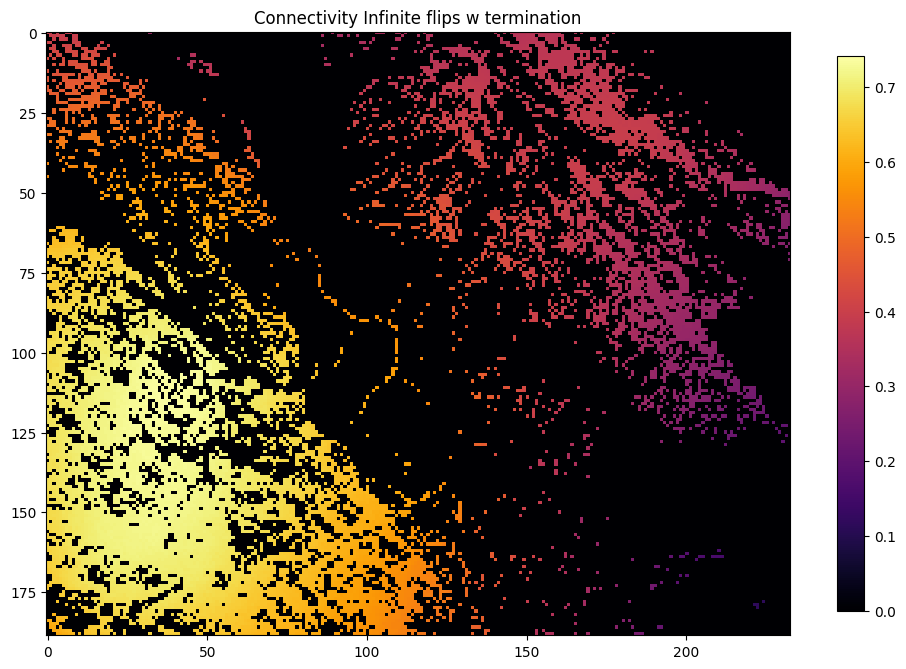

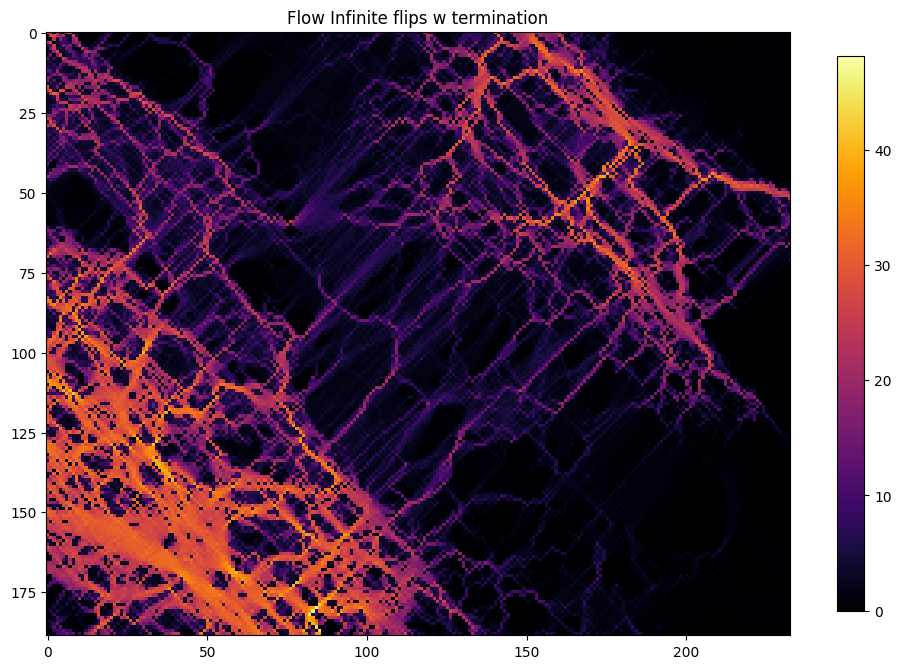

In [9]:
from IPython.display import display, Markdown
algos = [
    "compute_connectivity_v5", 
    ]
titles = {
    "compute_connectivity_diagonal": "Diagonal penalization",
    "compute_connectivity_orig": "Original",
    "compute_connectivity_v4": "Infinite flips",
    "compute_connectivity_v5": "Infinite flips w termination",
    "compute_connectivity_v3": "Two coin flips",
    "compute_connectivity_v2": "Single coin flip",
    
}

for algo in algos:
    display(Markdown(f"## {titles[algo]}"))
    t0 = time.time()
    alg = getattr(ecoscape_connectivity, algo)
    alg(
        habitat_fn=HABITAT_PATH,
        landcover_fn=LANDCOVER_PATH,
        permeability_dict=permeability_dict,
        permeability_scaling=1/12,
        connectivity_fn=CONNECTIVITY_PATH,
        flow_fn=FLOW_PATH,
        single_tile=True,
        border_size=50,
        batch_size=20,
        gap_crossing=0,
        num_simulations=1000,
        include_border=False,
        dispersal=100,
    )
    print("Time:", time.time() - t0)
    single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
    t = single_connectivity.get_all_as_tile(b=0)
    print(t.m.shape)
    t.draw_tile(width=12, height=12, title=f"Connectivity {titles[algo]}")
    single_flow = GeoTiff.from_file(FLOW_PATH)
    t = single_flow.get_all_as_tile(b=0)
    t.draw_tile(width=12, height=12, title=f"Flow {titles[algo]}")

In [10]:
permeability_dict_scaled

{0: 0.0,
 100: 1.0,
 101: 1.0,
 104: 1.0,
 105: 1.0,
 106: 1.0,
 107: 1.0,
 108: 1.0,
 109: 1.0,
 201: 0.9210041955228034,
 202: 0.0,
 300: 0.0,
 303: 0.0,
 304: 0.9639073907129757,
 305: 0.9299552542174412,
 306: 0.0,
 307: 0.9792328936897571,
 308: 1.0,
 400: 0.0,
 401: 0.8590596963520319,
 404: 0.9973694530767077,
 405: 0.9973694530767077,
 406: 0.0,
 407: 0.0,
 500: 0.9370895689386479,
 501: 0.8971480900510929,
 502: 0.9006412786862458,
 503: 0.0,
 505: 0.9555383899292446,
 506: 0.96383930940939,
 507: 0.0,
 510: 0.0,
 511: 0.9115777770697373,
 513: 0.9100701667885981,
 514: 0.0,
 515: 0.0,
 600: 0.8642393119950798,
 801: 0.8017757301668534,
 802: 0.8189490375884075,
 803: 0.8617867800940735,
 900: 0.9100156372248213,
 908: 0.0,
 909: 0.8845734140537516,
 1101: 0.0,
 1102: 0.0,
 1103: 0.0,
 1104: 0.0,
 1105: 0.0,
 1106: 0.0,
 1200: 0.8619797088824638,
 1206: 0.8910752965570754,
 1207: 0.0,
 1401: 0.9435370221031639,
 1402: 0.9973694530767077,
 1403: 0.9608342299997158,
 1404: 0.0,


In [11]:
permeability_dict

{0: 0.0,
 100: 1.0,
 101: 1.0,
 104: 1.0,
 105: 1.0,
 106: 1.0,
 107: 1.0,
 108: 1.0,
 109: 1.0,
 201: 0.372511172600383,
 202: 0.0,
 300: 0.0,
 303: 0.0,
 304: 0.6433150662797593,
 305: 0.41835467859997044,
 306: 0.0,
 307: 0.7773774215593373,
 308: 1.0,
 400: 0.0,
 401: 0.16154001907323448,
 404: 0.9688861611972633,
 405: 0.9688861611972633,
 406: 0.0,
 407: 0.0,
 500: 0.4585357945374464,
 501: 0.27187523064431995,
 502: 0.2848539032924843,
 503: 0.0,
 505: 0.5793989191066226,
 506: 0.6427700257241215,
 507: 0.0,
 510: 0.0,
 511: 0.329249216446383,
 513: 0.322773992920689,
 514: 0.0,
 515: 0.0,
 600: 0.17362338065104246,
 801: 0.07057239751237096,
 802: 0.0910086186252019,
 803: 0.16780230884477418,
 900: 0.32254198980883586,
 908: 0.0,
 909: 0.22951262997908678,
 1101: 0.0,
 1102: 0.0,
 1103: 0.0,
 1104: 0.0,
 1105: 0.0,
 1106: 0.0,
 1200: 0.16825365650882254,
 1206: 0.2505952563327229,
 1207: 0.0,
 1401: 0.49786012745944425,
 1402: 0.9688861611972633,
 1403: 0.6191296438219848,
 14

## Diagonal

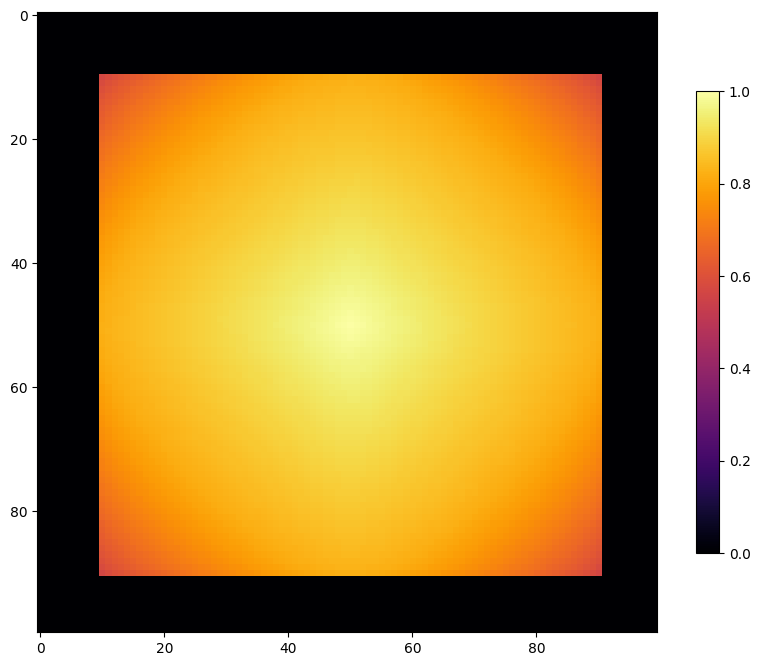

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [7]:

# hab = torch.zeros((100, 100), device=device)
# hab[50:51, :] = 1
hab = torch.ones((100, 100), device=device)
ter = hab # torch.zeros((100, 100), device=device)
repopulator = ecoscape_connectivity.RandomPropagate_diagonal(
    hab, ter, 
    num_spreads=40,
    spread_size=1, device=device).to(device)
seeds = torch.zeros((100, 100, 100))
seeds[:, 50, 50] = 1
seeds = seeds.to(device)
pop = repopulator(seeds)
a = pop.cpu().detach().numpy()
a = np.mean(a, 0)
plt.figure(figsize=(10, 10))
plt.imshow(a, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()
tot_pop = pop.sum()
tot_pop.backward()
flow = repopulator.get_grad()
flow = flow.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
# plt.imshow(flow, cmap='inferno')
# plt.colorbar(shrink=0.6)
# plt.show()


(1, 189, 233)


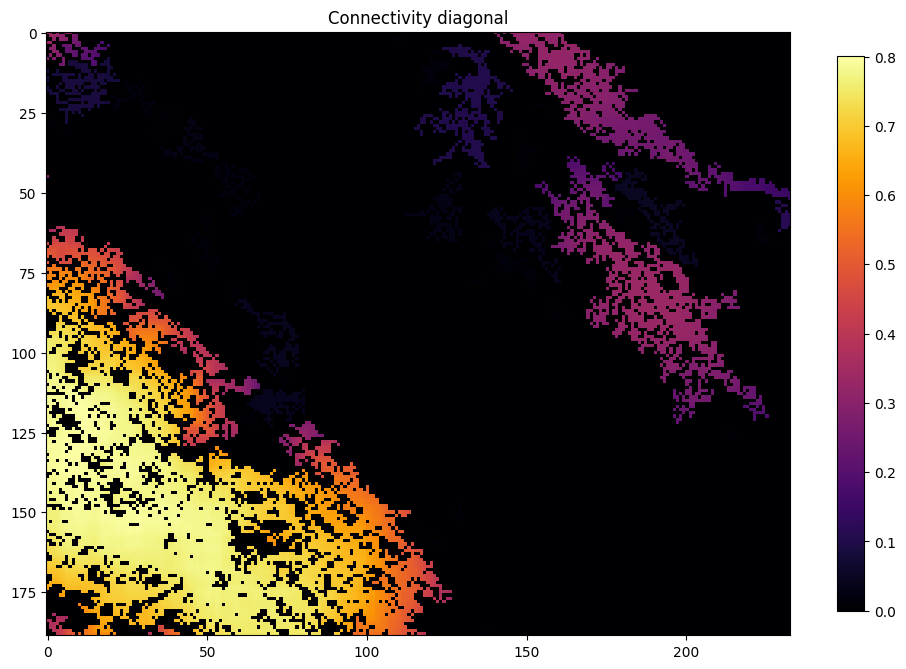

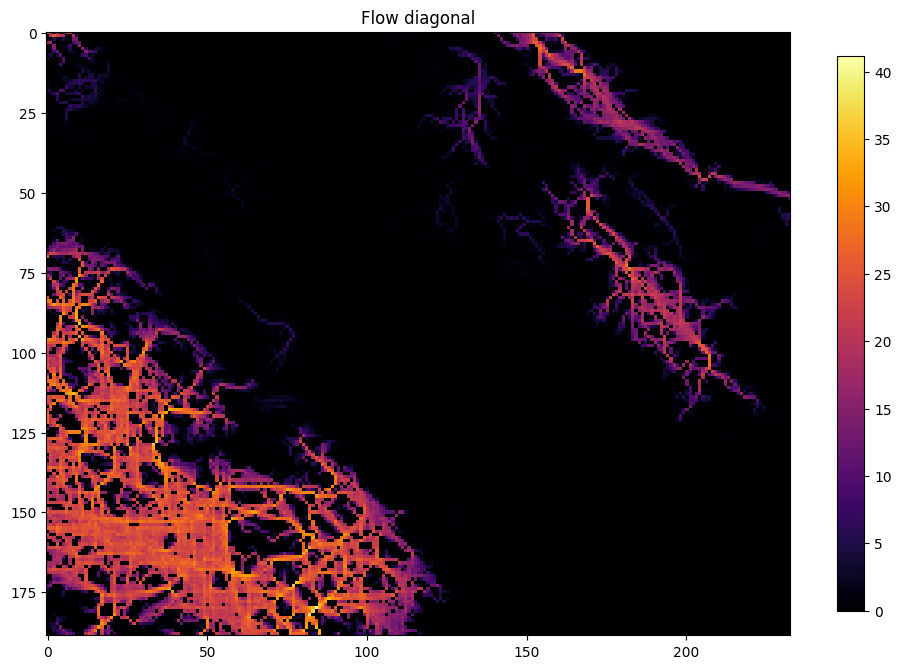

In [11]:
ecoscape_connectivity.compute_connectivity_diagonal(
    habitat_fn=HABITAT_PATH,
    landcover_fn=LANDCOVER_PATH,
    permeability_dict=permeability_dict,
    connectivity_fn=CONNECTIVITY_PATH,
    flow_fn=FLOW_PATH,
    single_tile=True,
    border_size=50,
    batch_size=20,
    num_simulations=400,
    include_border=False,
    dispersal=50,
)
single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
print(t.m.shape)
t.draw_tile(width=12, height=12, title=f"Connectivity diagonal")
single_flow = GeoTiff.from_file(FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(width=12, height=12, title=f"Flow diagonal")

## Infinite flips

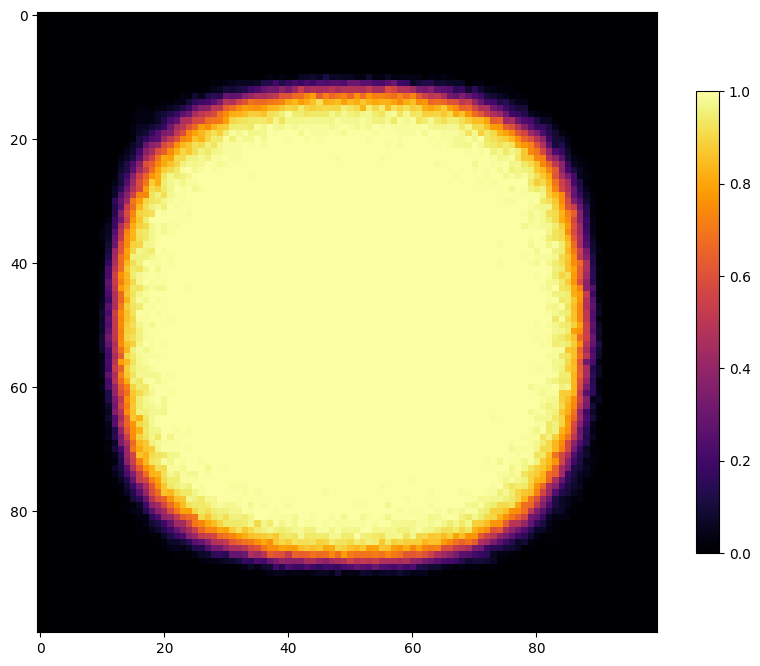

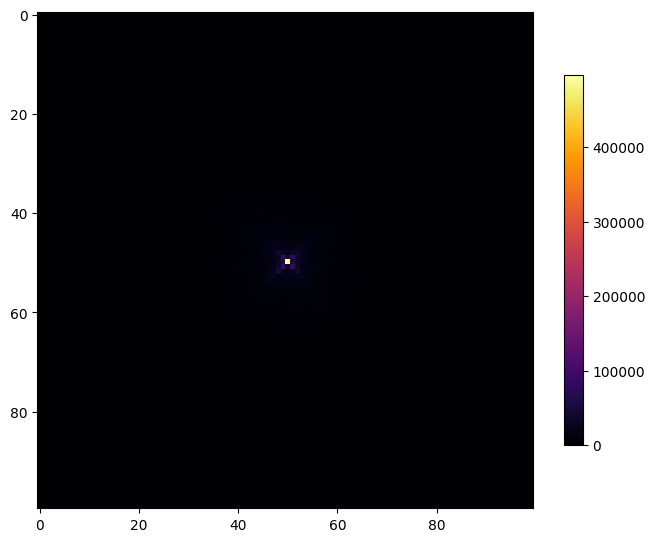

In [6]:

# hab = torch.zeros((100, 100), device=device)
# hab[50:51, :] = 1
hab = torch.ones((100, 100), device=device)
ter = hab # torch.zeros((100, 100), device=device)
repopulator = ecoscape_connectivity.RandomPropagate_v5(
    hab, ter, 
    num_spreads=40, 
    spread_size=1, device=device).to(device)
seeds = torch.zeros((100, 100, 100))
seeds[:, 50, 50] = 1
seeds = seeds.to(device)
pop = repopulator(seeds)
a = pop.cpu().detach().numpy()
a = np.mean(a, 0)
plt.figure(figsize=(10, 10))
plt.imshow(a, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()
tot_pop = pop.sum()
tot_pop.backward()
flow = repopulator.get_grad()
flow = flow.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(flow, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()


## Diagonally sound. 

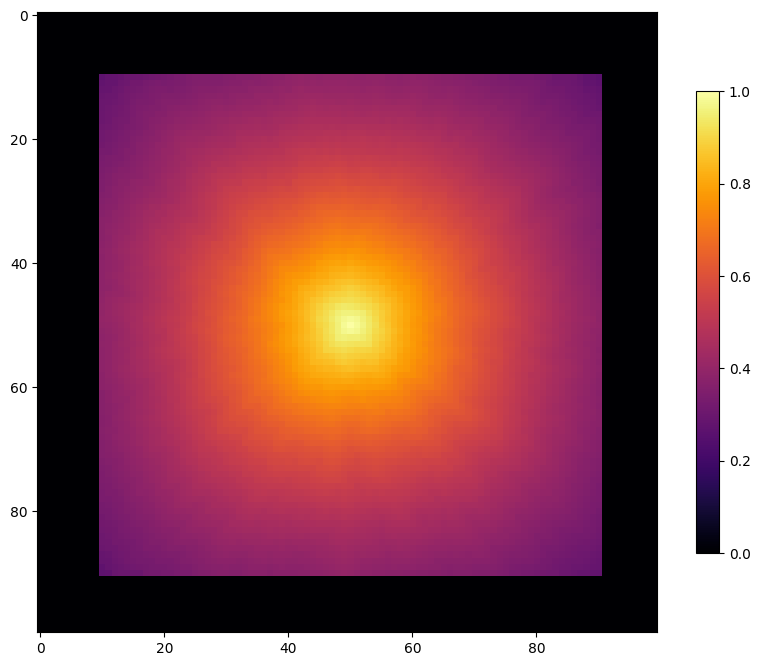

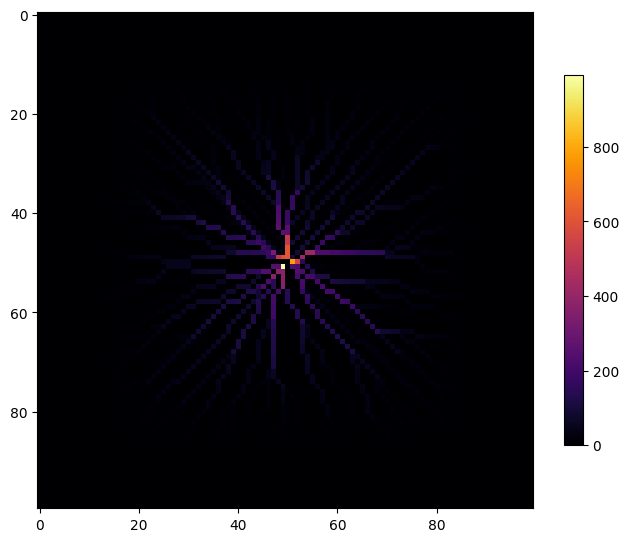

In [6]:

hab = torch.ones((100, 100), device=device)
ter = torch.ones((100, 100), device=device)
repopulator = ecoscape_connectivity.RandomPropagate_2b(
    hab, ter, 
    num_spreads=40, 
    spread_size=1, device=device).to(device)
seeds = torch.zeros((100, 100))
seeds[50, 50] = 1
seeds = seeds.to(device)
pop = repopulator(seeds)
a = pop.cpu().detach().numpy()
plt.figure(figsize=(10, 10))
plt.imshow(a, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()
tot_pop = pop.sum()
tot_pop.backward()
flow = repopulator.get_grad()
flow = flow.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(flow, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()


Time: 252.22106790542603
(1, 189, 233)


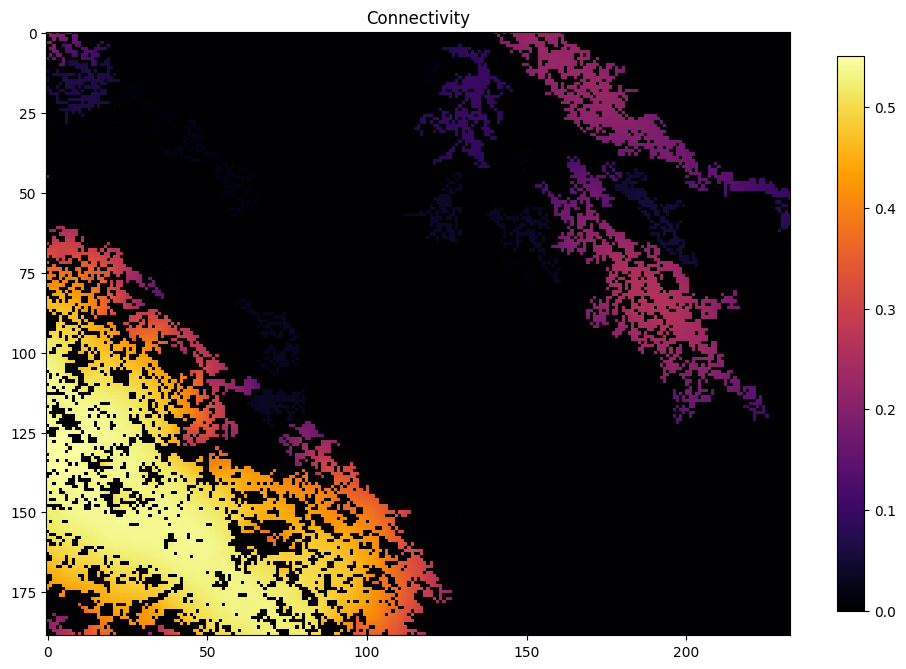

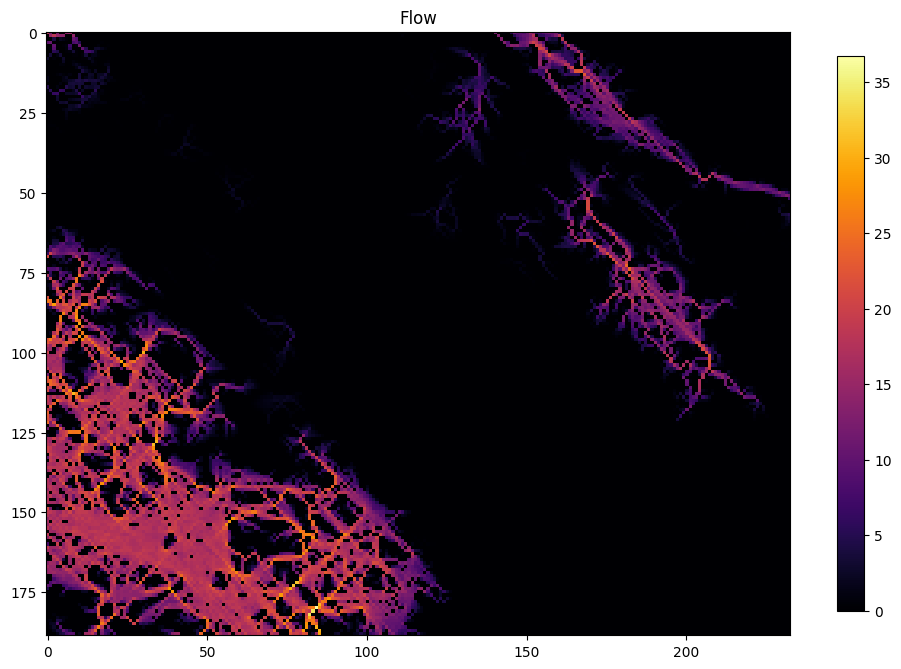

In [7]:
t = time.time()
ecoscape_connectivity.compute_connectivity_2b(
    habitat_fn=HABITAT_PATH,
    landcover_fn=LANDCOVER_PATH,
    permeability_dict=permeability_dict,
    connectivity_fn=CONNECTIVITY_PATH,
    flow_fn=FLOW_PATH,
    single_tile=True,
    border_size=50,
    num_simulations=2000,
    include_border=False,
    dispersal=50, # ecoscape_connectivity.half_cauchy(10, 40),
)
print("Time:", time.time() - t)
single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
print(t.m.shape)
t.draw_tile(width=12, height=12, title="Connectivity")
single_flow = GeoTiff.from_file(FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(width=12, height=12, title="Flow")

## Version v3

New


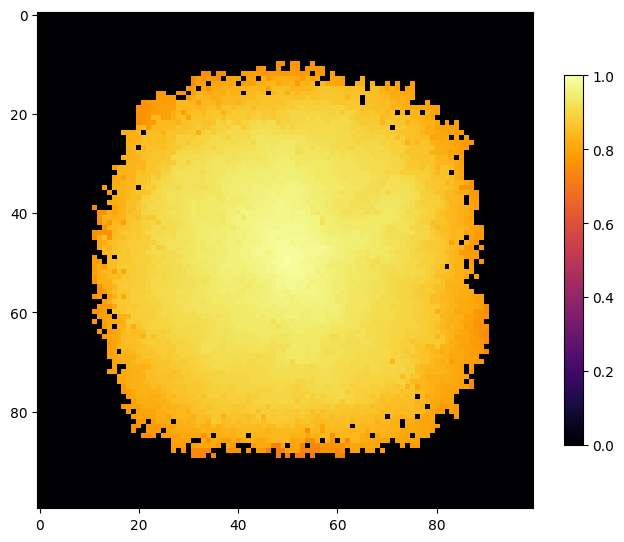

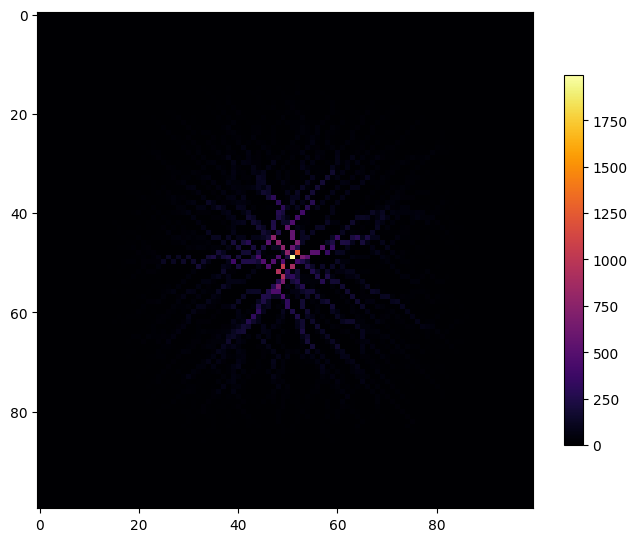

In [8]:

hab = torch.ones((100, 100), device=device)
ter = torch.ones((100, 100), device=device)
repopulator = ecoscape_connectivity.RandomPropagate_v3(
    hab, ter, 
    num_spreads=40, 
    spread_size=1, device=device).to(device)
seeds = torch.zeros((100, 100))
seeds[50, 50] = 1
seeds = seeds.to(device)
pop = repopulator(seeds)
a = pop.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(a, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()
tot_pop = pop.sum()
tot_pop.backward()
flow = repopulator.get_grad()
flow = flow.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(flow, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()


New
Time: 26.52492070198059
(1, 189, 233)


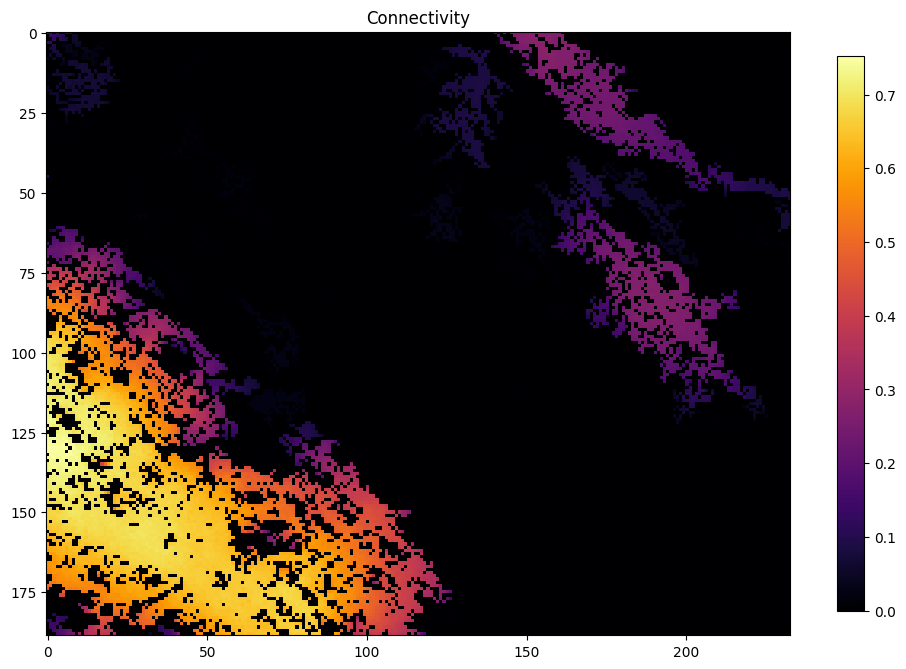

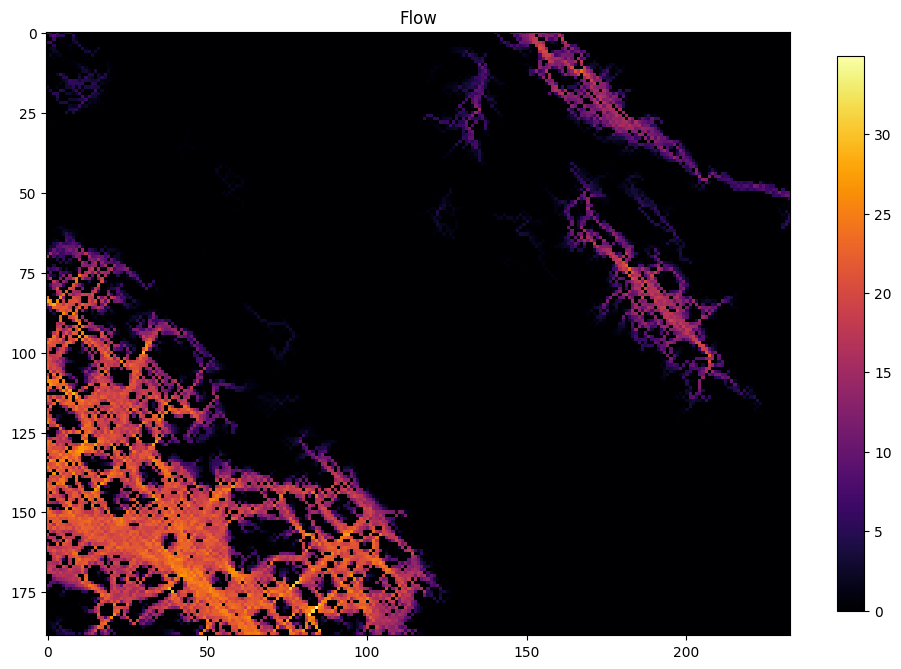

In [9]:
t0 = time.time()
ecoscape_connectivity.compute_connectivity_v3(
    habitat_fn=HABITAT_PATH,
    landcover_fn=LANDCOVER_PATH,
    permeability_dict=permeability_dict,
    connectivity_fn=CONNECTIVITY_PATH,
    flow_fn=FLOW_PATH,
    single_tile=True,
    border_size=50,
    num_simulations=400,
    include_border=False,
    dispersal=50, # ecoscape_connectivity.half_cauchy(10, 40),
)
print("Time:", time.time() - t0)
single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
print(t.m.shape)
t.draw_tile(width=12, height=12, title="Connectivity")
single_flow = GeoTiff.from_file(FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(width=12, height=12, title="Flow")

## Version v2

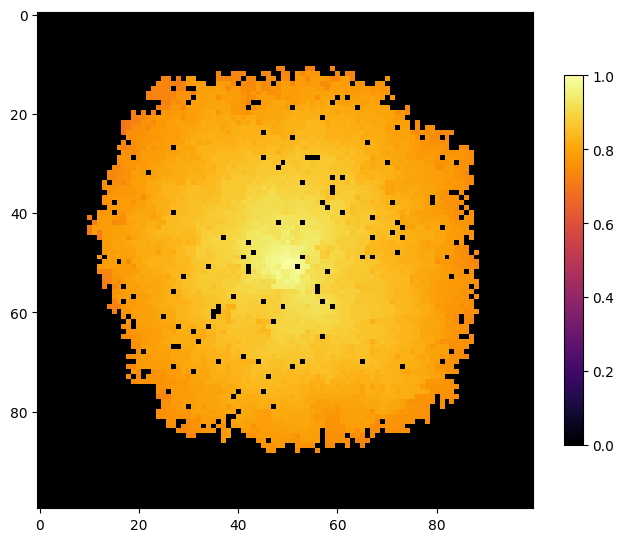

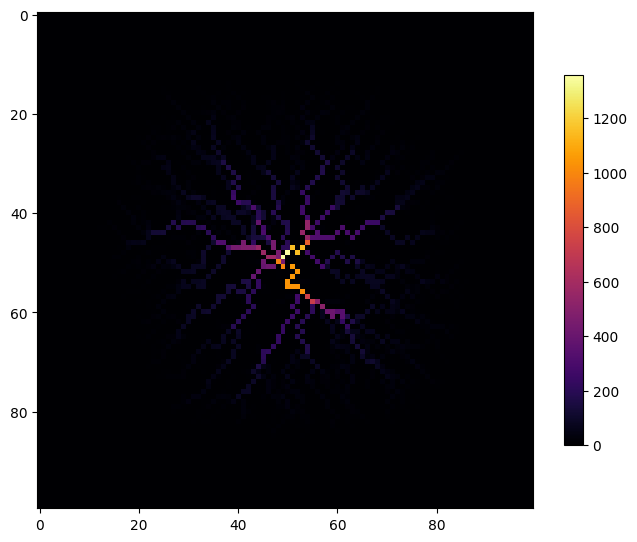

In [8]:

hab = torch.ones((100, 100), device=device)
ter = torch.ones((100, 100), device=device)
repopulator = ecoscape_connectivity.RandomPropagate_v2(
    hab, ter, 
    num_spreads=40, 
    spread_size=1, device=device).to(device)
seeds = torch.zeros((100, 100))
seeds[50, 50] = 1
seeds = seeds.to(device)
pop = repopulator(seeds)
a = pop.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(a, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()
tot_pop = pop.sum()
tot_pop.backward()
flow = repopulator.get_grad()
flow = flow.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(flow, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()


Single tile
New
Time: 104.90367102622986
(1, 189, 233)


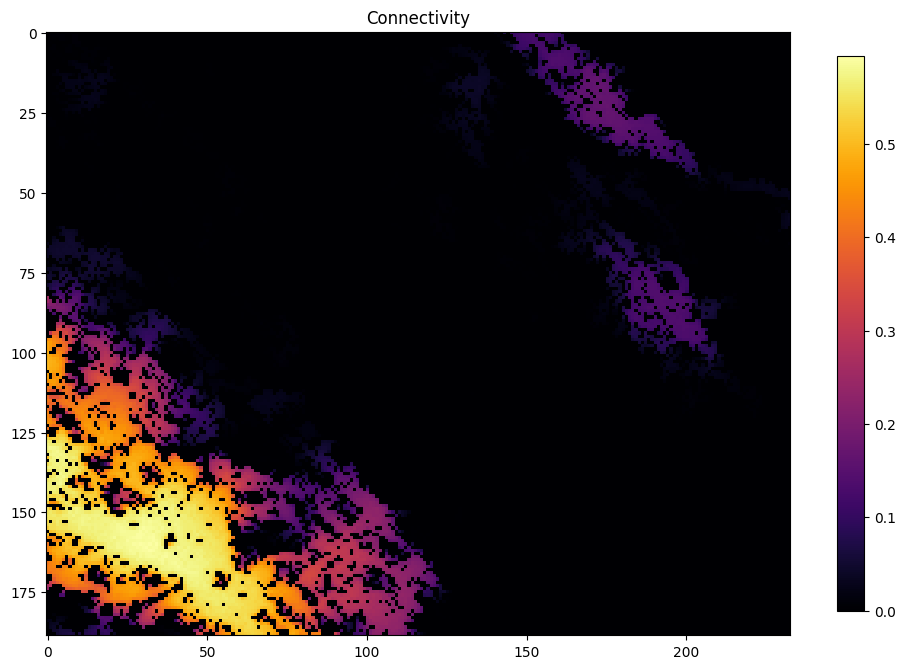

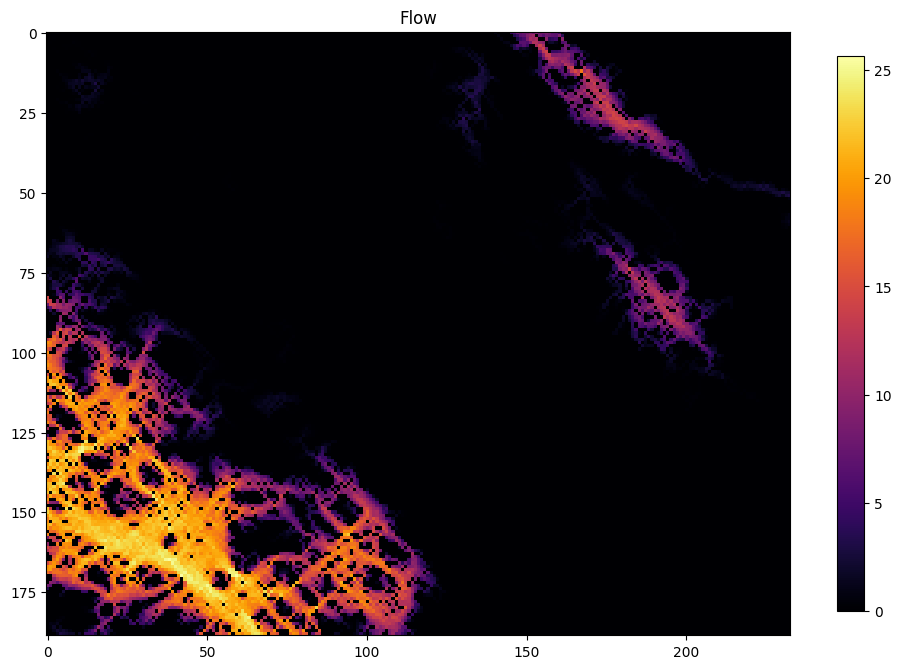

In [10]:
t0 = time.time()
ecoscape_connectivity.compute_connectivity_v2(
    habitat_fn=HABITAT_PATH,
    landcover_fn=LANDCOVER_PATH,
    permeability_dict=permeability_dict,
    connectivity_fn=CONNECTIVITY_PATH,
    flow_fn=FLOW_PATH,
    single_tile=True,
    border_size=50,
    num_simulations=2000,
    include_border=False,
    dispersal=50, # ecoscape_connectivity.half_cauchy(10, 40),
)
print("Time:", time.time() - t0)
single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
print(t.m.shape)
t.draw_tile(width=12, height=12, title="Connectivity")
single_flow = GeoTiff.from_file(FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(width=12, height=12, title="Flow")

## Version v

New


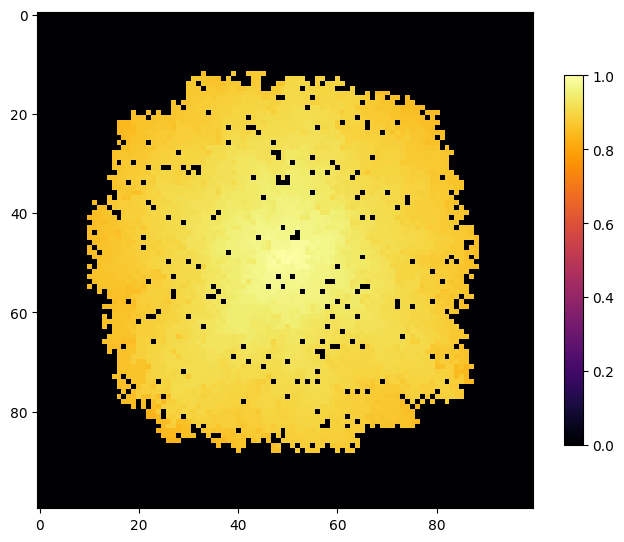

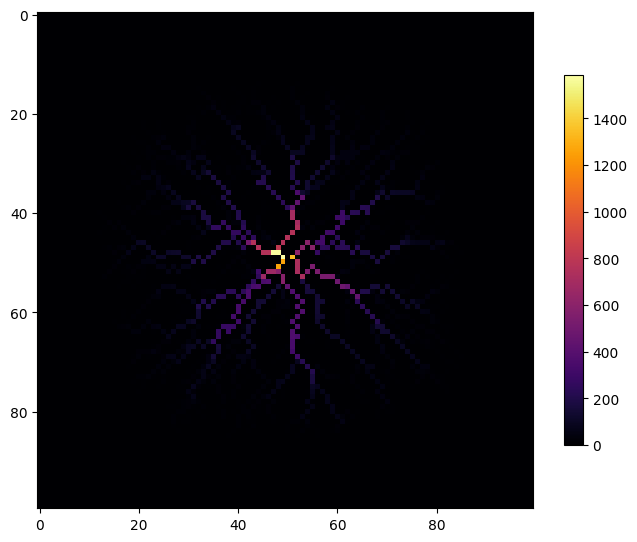

In [6]:

hab = torch.ones((100, 100), device=device)
ter = torch.ones((100, 100), device=device)
repopulator = ecoscape_connectivity.RandomPropagate_v4(
    hab, ter, 
    num_spreads=40, 
    spread_size=1, device=device).to(device)
seeds = torch.zeros((100, 100))
seeds[50, 50] = 1
seeds = seeds.to(device)
pop = repopulator(seeds)
a = pop.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(a, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()
tot_pop = pop.sum()
tot_pop.backward()
flow = repopulator.get_grad()
flow = flow.cpu().detach().numpy()
plt.figure(figsize=(8, 8))
plt.imshow(flow, cmap='inferno')
plt.colorbar(shrink=0.6)
plt.show()


Single tile
New
Time: 164.5379409790039
(1, 189, 233)


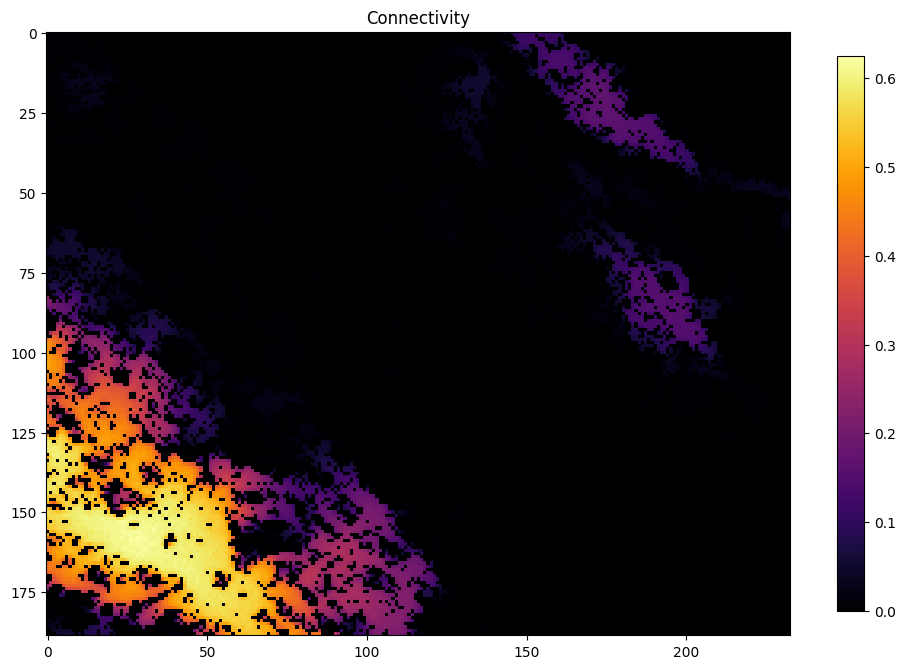

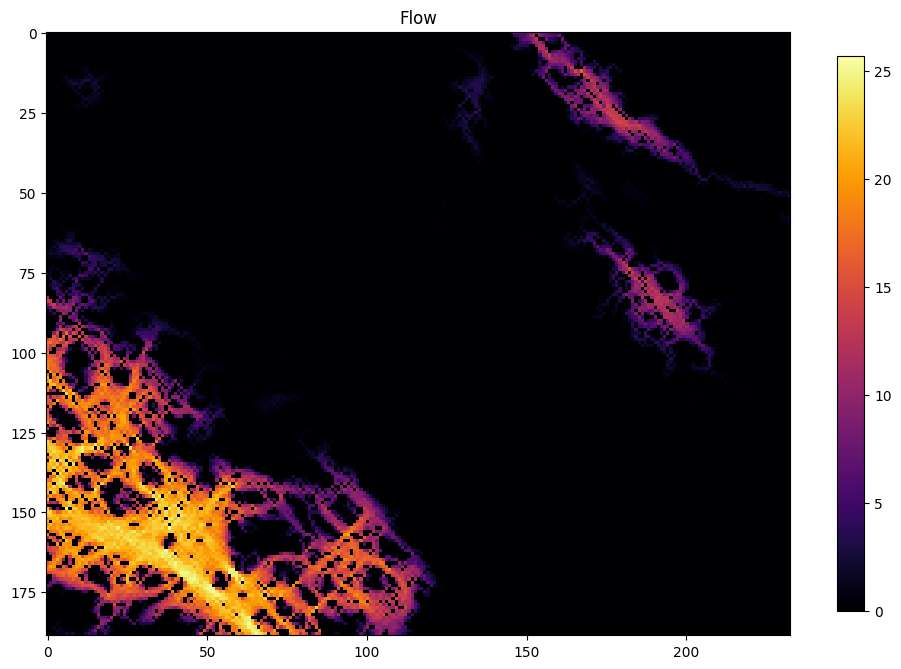

In [8]:
t0 = time.time()
ecoscape_connectivity.compute_connectivity_v(
    habitat_fn=HABITAT_PATH,
    landcover_fn=LANDCOVER_PATH,
    permeability_dict=permeability_dict,
    connectivity_fn=CONNECTIVITY_PATH,
    flow_fn=FLOW_PATH,
    single_tile=True,
    border_size=50,
    num_simulations=2000,
    include_border=False,
    dispersal=50, # ecoscape_connectivity.half_cauchy(10, 40),
)
print("Time:", time.time() - t0)
single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
t = single_connectivity.get_all_as_tile(b=0)
print(t.m.shape)
t.draw_tile(width=12, height=12, title="Connectivity")
single_flow = GeoTiff.from_file(FLOW_PATH)
t = single_flow.get_all_as_tile(b=0)
t.draw_tile(width=12, height=12, title="Flow")

## Infinite flips

## Version comparison

In [42]:
permeability_dict

{0: 0.0,
 100: 1.0,
 101: 1.0,
 104: 1.0,
 105: 1.0,
 106: 1.0,
 107: 1.0,
 108: 1.0,
 109: 1.0,
 201: 0.9210041955228034,
 202: 0.0,
 300: 0.0,
 303: 0.0,
 304: 0.9639073907129757,
 305: 0.9299552542174412,
 306: 0.0,
 307: 0.9792328936897571,
 308: 1.0,
 400: 0.0,
 401: 0.8590596963520319,
 404: 0.9973694530767077,
 405: 0.9973694530767077,
 406: 0.0,
 407: 0.0,
 500: 0.9370895689386479,
 501: 0.8971480900510929,
 502: 0.9006412786862458,
 503: 0.0,
 505: 0.9555383899292446,
 506: 0.96383930940939,
 507: 0.0,
 510: 0.0,
 511: 0.9115777770697373,
 513: 0.9100701667885981,
 514: 0.0,
 515: 0.0,
 600: 0.8642393119950798,
 801: 0.8017757301668534,
 802: 0.8189490375884075,
 803: 0.8617867800940735,
 900: 0.9100156372248213,
 908: 0.0,
 909: 0.8845734140537516,
 1101: 0.0,
 1102: 0.0,
 1103: 0.0,
 1104: 0.0,
 1105: 0.0,
 1106: 0.0,
 1200: 0.8619797088824638,
 1206: 0.8910752965570754,
 1207: 0.0,
 1401: 0.9435370221031639,
 1402: 0.9973694530767077,
 1403: 0.9608342299997158,
 1404: 0.0,


In [43]:
from ecoscape_connectivity import util

In [47]:
gt = GeoTiff.from_file(LANDCOVER_PATH)
m = gt.get_all_as_tile(b=0).m
m = m.astype(float)


In [48]:
gt_p = util.dict_translate(m, permeability_dict)

In [49]:
np.max(gt_p)

np.float64(1.0)

In [50]:
from matplotlib import pyplot as plt

In [51]:
gt_p = np.squeeze(gt_p, axis=0)

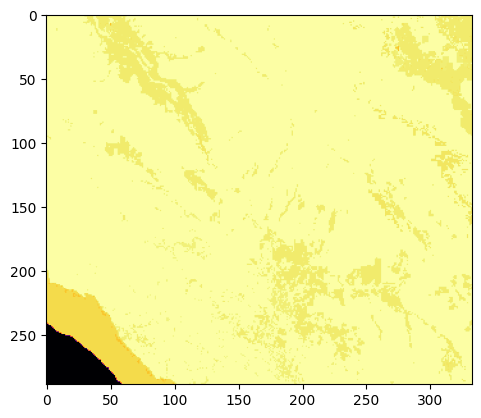

In [52]:
plt.imshow(gt_p, cmap='inferno')

## Infinite flips w termination

Time: 30.487393140792847
(1, 189, 233)


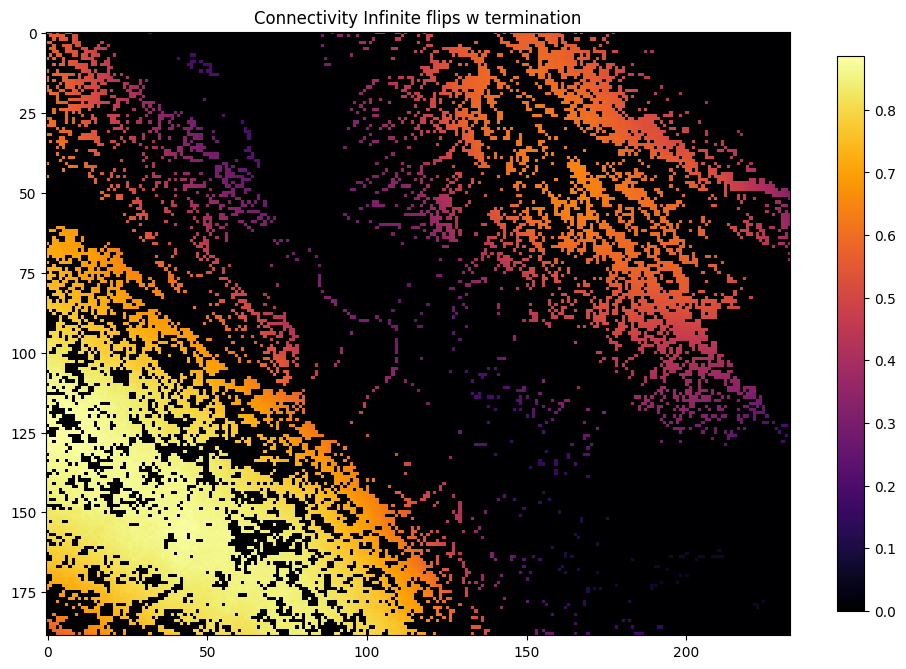

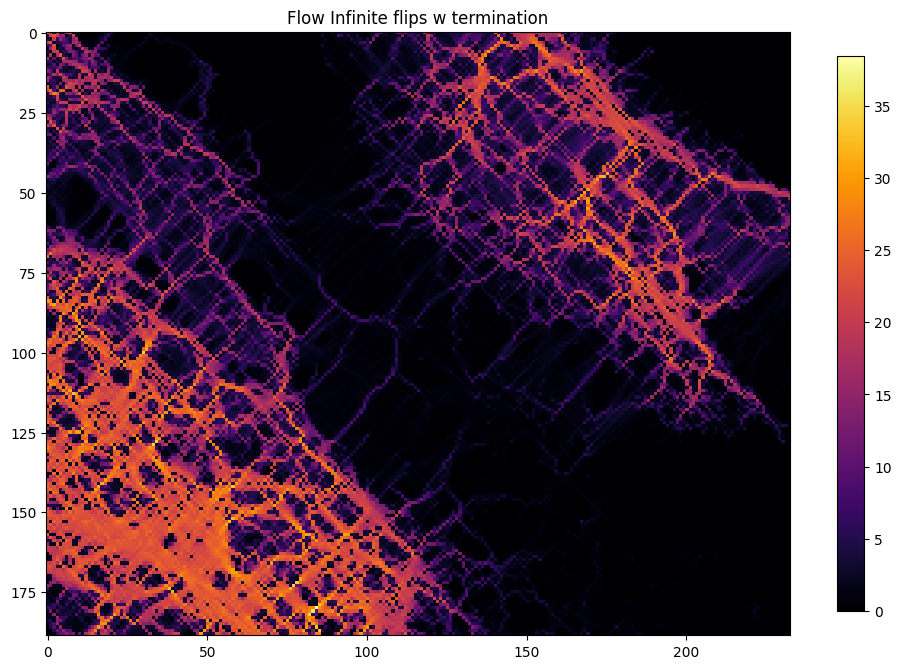

## Diagonal penalization

KeyboardInterrupt: 

In [53]:
from IPython.display import display, Markdown
algos = [
    "compute_connectivity_v5", 
    "compute_connectivity_diagonal",
    "compute_connectivity_orig", 
    "compute_connectivity_v2", 
    "compute_connectivity_v3",
    "compute_connectivity_v4", 
    ]
titles = {
    "compute_connectivity_diagonal": "Diagonal penalization",
    "compute_connectivity_orig": "Original",
    "compute_connectivity_v4": "Infinite flips",
    "compute_connectivity_v5": "Infinite flips w termination",
    "compute_connectivity_v3": "Two coin flips",
    "compute_connectivity_v2": "Single coin flip",
    
}

for algo in algos:
    display(Markdown(f"## {titles[algo]}"))
    t0 = time.time()
    alg = getattr(ecoscape_connectivity, algo)
    alg(
        habitat_fn=HABITAT_PATH,
        landcover_fn=LANDCOVER_PATH,
        permeability_dict=permeability_dict,
        connectivity_fn=CONNECTIVITY_PATH,
        flow_fn=FLOW_PATH,
        single_tile=True,
        border_size=50,
        batch_size=20,
        num_simulations=1000,
        include_border=False,
        dispersal=50,
    )
    print("Time:", time.time() - t0)
    single_connectivity = GeoTiff.from_file(CONNECTIVITY_PATH)
    t = single_connectivity.get_all_as_tile(b=0)
    print(t.m.shape)
    t.draw_tile(width=12, height=12, title=f"Connectivity {titles[algo]}")
    single_flow = GeoTiff.from_file(FLOW_PATH)
    t = single_flow.get_all_as_tile(b=0)
    t.draw_tile(width=12, height=12, title=f"Flow {titles[algo]}")